In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd C:\Users\an-user\project_files\AB_Testing_Project

C:\Users\an-user\project_files\AB_Testing_Project


In [35]:
df1 = pd.read_csv('ab_data.csv')
df2 = pd.read_csv('countries.csv')

In [6]:
df = pd.merge(df1, df2, on = 'user_id')

In [7]:
df.to_csv('total_data.csv')

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


1 Exploratory Data Analysis
================

1 -1 Data Assess and Cleaning
-----------------

In [2]:
df = pd.read_csv('total_data.csv')
df.rename(columns = {'Unnamed: 0':'index_number'}, inplace = True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 7 columns):
index_number    294478 non-null int64
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
country         294478 non-null object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB


### (1) Quality Issue - Mismatch between variable and variable type

timestamp is considered as object in the orgiginal data frame, yet this variable has to be treated as time. This issue might cause serious issue since object cannot be calculated, but time variable could be calculated with simple mathematics. So this should be changed into datetime category.

In [4]:
df['timestamp'] = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 7 columns):
index_number    294478 non-null int64
user_id         294478 non-null int64
timestamp       294478 non-null datetime64[ns]
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
country         294478 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 15.7+ MB


### (2) Unique Observations - Are there any duplicated particiapnts or Missing Values?

#### 1) Missing Values

In order to find out whether there are missing values, isnull and sum methods are used as follows.

In [6]:
df.isnull().sum()

index_number    0
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
country         0
dtype: int64

It is clear that there is no missing values. So we could pass this part.


#### 2) Duplicated  Values

To find out how many duplicated observations are there, shape,nunique and duplicated methods are useful and strong tool to verify this problem.

In [90]:
df.shape

(294478, 7)

In [9]:
df.nunique()

index_number    294478
user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
country              3
dtype: int64

In [11]:
df.user_id.duplicated().sum()

3894

There seems to be a duplication problem here. Total number of rows are 294478 whereas the number of user_id's unique value is 290584. 
In order to check where this discrepancy came from, I have counted number of duplicated user_id and it was 3984. This part has caused inconsistency between total number of rows and unique values.


This quality issue is solved by applying for loop in the data frame as follows.

In [3]:
df['dupli'] = df.user_id.duplicated()
index_list = []
for i in range(0, df.shape[0]):
    if df.dupli[i] == True:
        index_list.append(df.index_number[i])
    else:
        pass

df = df.drop(index_list)

In [6]:
df.nunique()

index_number    290584
user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
country              3
dupli                1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 8 columns):
index_number    290584 non-null int64
user_id         290584 non-null int64
timestamp       290584 non-null datetime64[ns]
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
country         290584 non-null object
dupli           290584 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(3), object(3)
memory usage: 18.0+ MB


By removing duplicated rows in data frame, we now have 290584 unique observations. So far, I have cleaned dirty and messy data so that the data frame is qualified enought to be proceeded into more sophisticated analysis. 

1 -2 Univariate Data Analysis
-------------------------


A reason why univariate analysis is conducted is that it is possible for researchers to have a basic understanding of variables and there is certain error or not before moving on to more profound models. Since this research model is more like a two by two ANOVA analysis, it is important to check that each cell has similar amount of sample size because if there is discrepancy among cells, someone might suggest validity issues. 

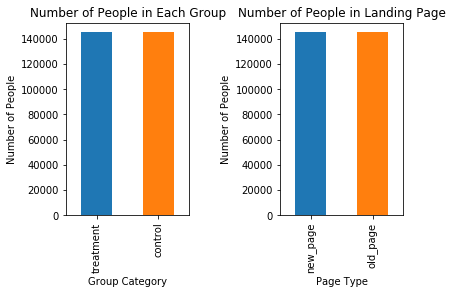

In [8]:
##Comparing Number of Samples in Each Cell.

plt.subplot(1, 2, 1)

group_df = df.group.value_counts()
group_df.plot(kind = 'bar')
plt.title('Number of People in Each Group')
plt.xlabel('Group Category')
plt.ylabel('Number of People')

plt.subplot(1, 2, 2)
landingpage_df = df.landing_page.value_counts()
landingpage_df.plot(kind = 'bar')
plt.title('Number of People in Landing Page')
plt.xlabel('Page Type')
plt.ylabel('Number of People');

plt.tight_layout(pad=0.4, w_pad=1, h_pad=1.0);

From two bar charts, we could conclude that each cell has similar level of sample size, leading us to move on to hypothesis testing. 

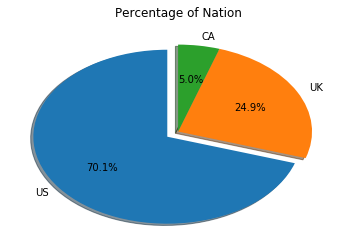

In [9]:
pie_country = df.country.value_counts()
labels = 'US', 'UK', 'CA'
explode = (0.1, 0, 0)
plt.pie(pie_country, labels = labels,
        explode = explode, shadow = True, autopct = '%1.1f%%', 
        startangle = 90)
plt.title('Percentage of Nation');

On the basis of univariate analysis above, it was possible to get a sense of what this dataset contains and of the variables features. To sum up the points, there were nice balance regarding number of sample between treatment and control group, between old page and new page. In addition, this research was conducted toward Western culture people, most of whom consisted of US citizens. 

2 Initializing AB Test
===================

2 - 1 Conceptual Framework
--------------------

The simple version yet main question is to answer this one. **Did more customers converted to real purchase in new page than old page? Did new page worked better than old page regarding sales?**

In order to answer this question, necessary variables should be defined in academic way, and relevant hypothesis should be established. 


#### (1) Necessary Variables and Groups

First, possiblity of converting in each webpage. 

Second, treatment group and control group.


To categorize the groups based on the above criteria and get the possiblity of converting rate, it is better to make sub-dataframe based on group category. So we need two sub-dataframe; one is for control group, which means they got old page. The other is for treatment group, which stands for they received new page. 

However, someone might ask that what if there are control group who got new page and vice versa. These people whose group category and page type do not line up should be exempted from the further research. 

Following coding will divide total dataframe into sub dataframes, reflecting the above consideration.

In [4]:
df_treat = df.query('landing_page == "new_page" & group == "treatment"')
df_control = df.query('landing_page == "old_page" & group == "control"')
frame = [df_treat, df_control]
df_analysis = pd.concat(frame)
df_analysis = df_analysis.drop(columns = ['dupli', 'index_number'])
df_analysis.head()

,user_id,timestamp,group,landing_page,converted,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,CA


Now we have our final dataset which is prepared for Hypothesis testing.

Initializing Hypothesis Testing
------------------------

H0. Possibility of converting to real purchase on new web page(p.new) is as same as or worse than possibility of old web page(p.old).

H1. Possibility of converting to real purchase on new webpage(p.new) is higher than possibiliy of old web page(p.old).


In order to verify H1 is right or not, we are going to start analysis assuming that H0 is right, get null values, distribution of null values by stimulating number of trials, compare null value distribution with observed difference, and calculate p-value. These are stardard steps for conducting Hypothesis testing. 



In [9]:
## (1)Convert rate for p.new under the null & number of people on new page
p_new = df_analysis[df_analysis['landing_page'] == 'new_page'].converted.mean()
n_new = df_analysis[df_analysis['landing_page'] == 'new_page'].shape[0]

## (2) Convert rate for old.new under the null & number of people on old page
p_old = df_analysis.query('landing_page == "old_page"').converted.mean()
n_old = df_analysis.query('landing_page == "old_page"').shape[0]


actual_difference = p_new - p_old
print(p_new, n_new, '/' ,p_old, n_old)

0.11872721981235362 144314 / 0.12029037760181936 144226


In [8]:
##Stimulating n_new transactions with convert rate of p_new under the null.
new_page_converted = np.random.binomial(1, p_new, n_new).mean()

##Stimulating n_old ransactions with convert rate of p_old under the null.
old_page_converted = np.random.binomial(1, p_old, n_old).mean()

##Difference between the above two values
possbility_difference = new_page_converted - old_page_converted

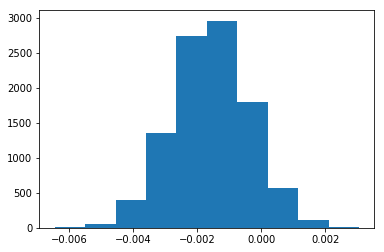

In [11]:
##Stimulating 10,000 p_new - p_old values using the same process.
p_diffs = np.random.binomial(n_new, p_new, 10000)/n_new - np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);


Getting the proportion of the p_diffs are greater than actual difference observed in the real dataset.

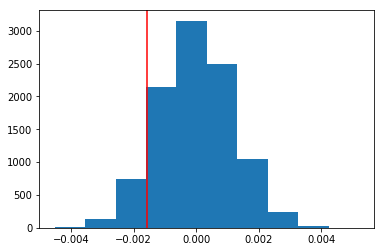

In [15]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals)
plt.axvline(actual_difference, color = 'red');

In [14]:
(null_vals > actual_difference).mean()

0.8968